In [1]:
import os
os.chdir("..")

In [2]:
# import the required libraries
from pump_controller import PumpController, get_serial_port, list_serial_ports
from pump_controller import visualize_rgb, visualize_candidates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

# Trying out the Pump Controller

### Setup

In [3]:
# Start by creating a PumpController
arduinobot = PumpController(get_serial_port(), cell_volume=20.0, drain_time=15.0)

Serial port /dev/cu.usbserial-1420 opened at baud rate 9600
Arduino is ready


In [ ]:
# Prime Pumps and hoses
for pump in ['R', 'G', 'B', 'Y', 'W']:

    arduinobot.purge_pump(pump, 5)
    time.sleep(7)

    arduinobot.purge_pump('D', 5)
    time.sleep(7)

In [4]:
# Create target for SilicoBot
arduinobot.change_target([0.1, 0.4, 0.1, 0.4])

Sent from PC -- TEST STR -- <Mix,2,0.7709294440000001>
Reply Received  Msg Mix,2,0.7709294440000001 Time 17
Sent from PC -- TEST STR -- <Mix,3,4.103436417999999>
Reply Received  Msg Mix,3,4.103436417999999 Time 21
Sent from PC -- TEST STR -- <Mix,4,0.7031724730000001>
Reply Received  Msg Mix,4,0.7031724730000001 Time 31
Sent from PC -- TEST STR -- <Mix,6,3.2987200519999997>
Reply Received  Msg Mix,6,3.2987200519999997 Time 34
Sent from PC -- TEST STR -- <Meas>
Reply Received  Msg Meas Time 43
Sent from PC -- TEST STR -- <Mix,8,15.0>
Reply Received  Msg Mix,8,15.0 Time 47
Sent from PC -- TEST STR -- <Mix,7,7.819166095>
Reply Received  Msg Mix,7,7.819166095 Time 79
Sent from PC -- TEST STR -- <Mix,8,15.0>
Reply Received  Msg Mix,8,15.0 Time 96
Target changed to [23, 61, 83]. Created by [0.1, 0.4, 0.1, 0.4].


[23, 61, 83]

In [5]:
# Get the target RGB color and target color mixture
print(arduinobot.target_color)

# Get the target RGB mixture
print(arduinobot.target_mixture)

[23, 61, 83]
[0.1, 0.4, 0.1, 0.4]


### Start Mixing

Sent from PC -- TEST STR -- <Mix,2,1.9936353670000002>
Reply Received  Msg Mix,2,1.9936353670000002 Time 248
Sent from PC -- TEST STR -- <Mix,3,2.504476945>
Reply Received  Msg Mix,3,2.504476945 Time 254
Sent from PC -- TEST STR -- <Mix,4,1.8324758470000002>
Reply Received  Msg Mix,4,1.8324758470000002 Time 261
Sent from PC -- TEST STR -- <Mix,6,2.0327980369999996>
Reply Received  Msg Mix,6,2.0327980369999996 Time 266
Sent from PC -- TEST STR -- <Meas>
Reply Received  Msg Meas Time 272
Sent from PC -- TEST STR -- <Mix,8,15.0>
Reply Received  Msg Mix,8,15.0 Time 277
Sent from PC -- TEST STR -- <Mix,7,7.819166095>
Reply Received  Msg Mix,7,7.819166095 Time 309
Sent from PC -- TEST STR -- <Mix,8,15.0>
Reply Received  Msg Mix,8,15.0 Time 326
[12, 59, 98]


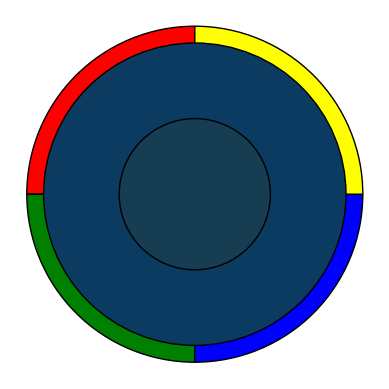

In [6]:
# Start by setting a mixture
color_mixture = [0.25, 0.25, 0.25, 0.25]

# Now mix the color
rgb_measurement = arduinobot.mix_color(color_mixture)
print(rgb_measurement)

visualize_rgb(mixture = color_mixture, rgb = rgb_measurement, pump_controller=arduinobot)

In [12]:
# Difference between mixed and target colors:
def color_difference(mixed_color, target_color):

    mixed_color = np.array(mixed_color)
    target_color = np.array(target_color)
    # Calculate the sum of root mean squared differences between mixed color and target color
    rmse = np.sqrt(np.mean((mixed_color - target_color)**2, axis=-1))
    return np.sum(rmse)

In [14]:
difference = color_difference(rgb_measurement, arduinobot.target_color)
print(difference)

10.801234497346433


Sent from PC -- TEST STR -- <Mix,3,1.9714904539999998>
Reply Received  Msg Mix,3,1.9714904539999998 Time 670
Sent from PC -- TEST STR -- <Mix,4,5.2203859690000005>
Reply Received  Msg Mix,4,5.2203859690000005 Time 676
Sent from PC -- TEST STR -- <Mix,6,0.7668760219999999>
Reply Received  Msg Mix,6,0.7668760219999999 Time 688
Sent from PC -- TEST STR -- <Meas>
Reply Received  Msg Meas Time 692
Sent from PC -- TEST STR -- <Mix,8,15.0>
Reply Received  Msg Mix,8,15.0 Time 697
Sent from PC -- TEST STR -- <Mix,7,7.819166095>
Reply Received  Msg Mix,7,7.819166095 Time 728
Sent from PC -- TEST STR -- <Mix,8,15.0>
Reply Received  Msg Mix,8,15.0 Time 745


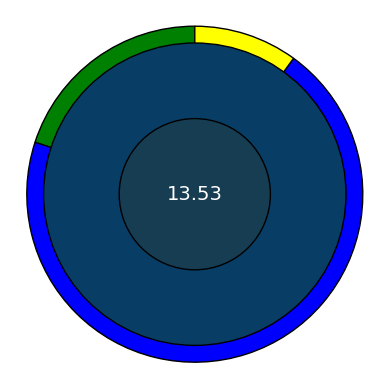

Sent from PC -- TEST STR -- <Mix,2,2.4012040079999997>
Reply Received  Msg Mix,2,2.4012040079999997 Time 777
Sent from PC -- TEST STR -- <Mix,3,0.9055174719999999>
Reply Received  Msg Mix,3,0.9055174719999999 Time 784
Sent from PC -- TEST STR -- <Mix,4,2.961779221>
Reply Received  Msg Mix,4,2.961779221 Time 788
Sent from PC -- TEST STR -- <Mix,6,1.610824032>
Reply Received  Msg Mix,6,1.610824032 Time 795
Sent from PC -- TEST STR -- <Meas>
Reply Received  Msg Meas Time 801
Sent from PC -- TEST STR -- <Mix,8,15.0>
Reply Received  Msg Mix,8,15.0 Time 805
Sent from PC -- TEST STR -- <Mix,7,7.819166095>
Reply Received  Msg Mix,7,7.819166095 Time 837
Sent from PC -- TEST STR -- <Mix,8,15.0>
Reply Received  Msg Mix,8,15.0 Time 854


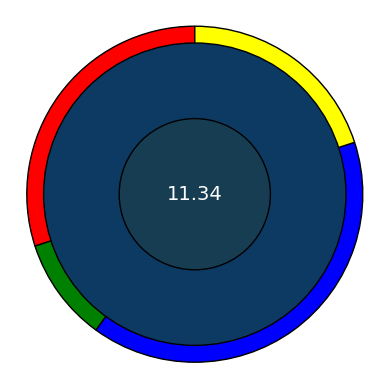

Sent from PC -- TEST STR -- <Mix,2,0.7709294440000001>
Reply Received  Msg Mix,2,0.7709294440000001 Time 886
Sent from PC -- TEST STR -- <Mix,3,6.235382381999999>
Reply Received  Msg Mix,3,6.235382381999999 Time 889
Sent from PC -- TEST STR -- <Mix,4,0.7031724730000001>
Reply Received  Msg Mix,4,0.7031724730000001 Time 904
Sent from PC -- TEST STR -- <Mix,6,1.610824032>
Reply Received  Msg Mix,6,1.610824032 Time 907
Sent from PC -- TEST STR -- <Meas>
Reply Received  Msg Meas Time 912
Sent from PC -- TEST STR -- <Mix,8,15.0>
Reply Received  Msg Mix,8,15.0 Time 917
Sent from PC -- TEST STR -- <Mix,7,7.819166095>
Reply Received  Msg Mix,7,7.819166095 Time 948
Sent from PC -- TEST STR -- <Mix,8,15.0>
Reply Received  Msg Mix,8,15.0 Time 966


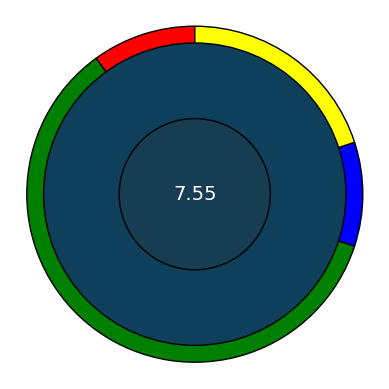

In [15]:
mixtures = [[0.0, 0.2, 0.7, 0.1],
            [0.3, 0.1, 0.4, 0.2],
            [0.1, 0.6, 0.1, 0.2]]

measurements = []
targets = []
scores = []

for color_mixture in mixtures:
    color_measurement = arduinobot.mix_color(color_mixture)
    score = color_difference(color_measurement, arduinobot.target_color)

    measurements.append(color_measurement)
    targets.append(arduinobot.target_color)
    scores.append(score)

    visualize_rgb(mixture = color_mixture, rgb = color_measurement,
                  pump_controller = arduinobot, score = score)


In [16]:
data = [mixtures, measurements, targets, scores]
data = [np.array(col) for col in data]

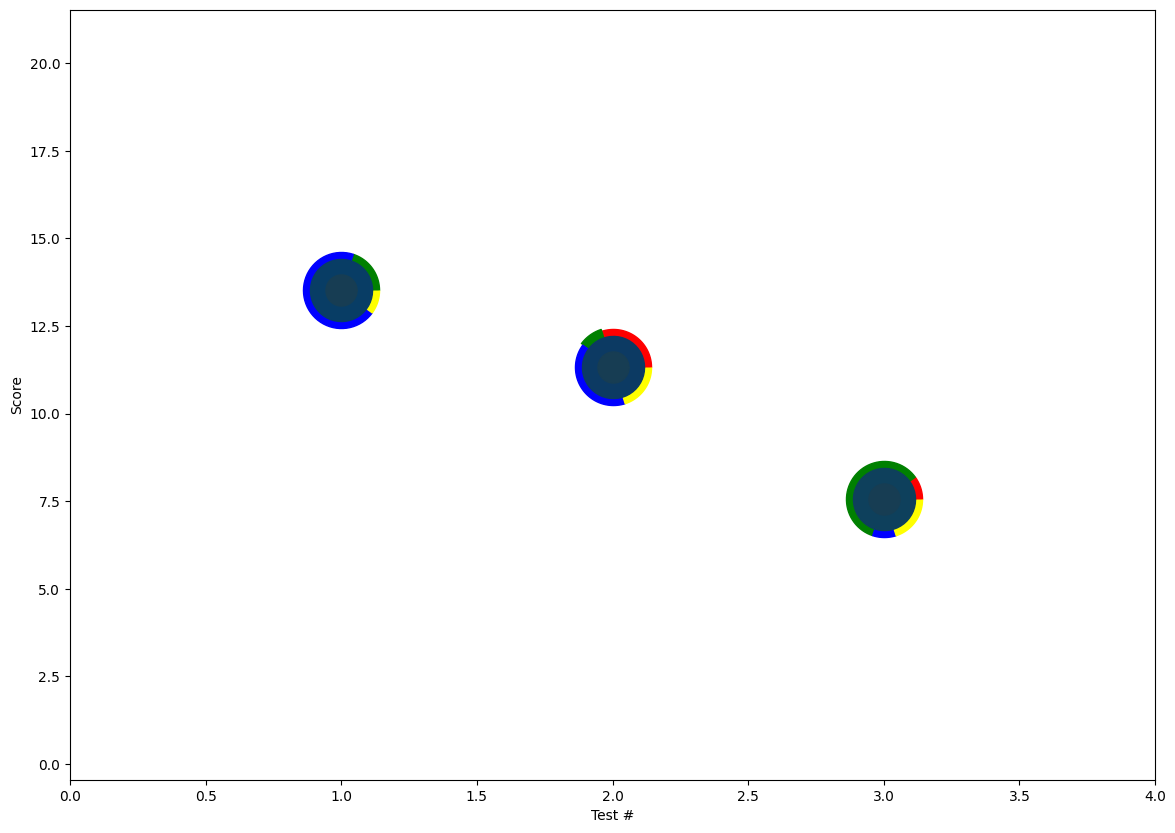

In [17]:
visualize_candidates(data)

# Scipy Optimization

In [3]:
import numpy as np

try:
    from scipy.optimize import minimize
except:
    !pip3 install scipy --user --upgrade
    from scipy.optimize import minimize

from IPython import display

In [4]:
# Difference between mixed and target colors:
def color_difference(mixed_color, target_color):

    mixed_color = np.array(mixed_color)
    target_color = np.array(target_color)
    # Calculate the sum of root mean squared differences between mixed color and target color
    rmse = np.sqrt(np.mean((mixed_color - target_color)**2, axis=-1))
    return np.sum(rmse)

### Setup

In [51]:
# Instantiate your PumpController
arduinobot = PumpController(get_serial_port(), cell_volume=20.0, drain_time=20.0) 

Serial port /dev/cu.usbserial-1420 opened at baud rate 9600
Arduino is ready


In [52]:
target_color_mixture = [0.4,0.2,0.3,0.1]
arduinobot.change_target(target_color_mixture)

Sent from PC -- TEST STR -- <Mix,2,3.216341289999999>
Reply Received  Msg Mix,2,3.216341289999999 Time 15
Sent from PC -- TEST STR -- <Mix,3,1.9714904539999993>
Reply Received  Msg Mix,3,1.9714904539999993 Time 24
Sent from PC -- TEST STR -- <Mix,4,2.2089103049999994>
Reply Received  Msg Mix,4,2.2089103049999994 Time 30
Sent from PC -- TEST STR -- <Mix,6,0.7668760219999997>
Reply Received  Msg Mix,6,0.7668760219999997 Time 36
Sent from PC -- TEST STR -- <Meas>
Reply Received  Msg Meas Time 40
Sent from PC -- TEST STR -- <Mix,8,20.0>
Reply Received  Msg Mix,8,20.0 Time 45
Sent from PC -- TEST STR -- <Mix,7,7.819166095>
Reply Received  Msg Mix,7,7.819166095 Time 86
Sent from PC -- TEST STR -- <Mix,8,20.0>
Reply Received  Msg Mix,8,20.0 Time 103
Target changed to [13, 60, 96]. Created by [0.4, 0.2, 0.3, 0.1].


[13, 60, 96]

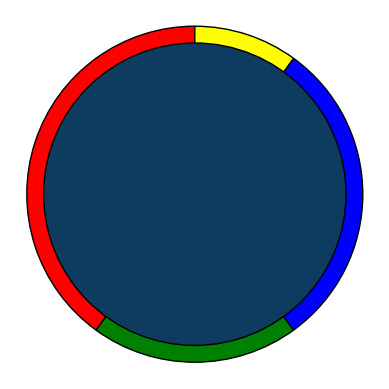

In [53]:
visualize_rgb(mixture = arduinobot.target_mixture, rgb = arduinobot.target_color, pump_controller=arduinobot, target = None)

### Optimize

In [54]:
func_calls = [0]

# Data storage
mixtures = []
measurements = []
targets = []
scores = []

In [55]:
# Set initial guess
x0 = np.random.rand(4)
x0 /= np.sum(x0)  # Normalize to ensure the sum is 1
print(x0)

[0.37470038 0.37791347 0.01031714 0.23706902]


In [56]:
def find_color(color_mixture, func_calls = func_calls, n_func_calls = 1):
    
    mixed_color = arduinobot.mix_color(color_mixture)
    score = color_difference(mixed_color, arduinobot.target_color)

    mixtures.append(color_mixture)
    measurements.append(mixed_color)
    targets.append(arduinobot.target_color)
    scores.append(score)

    data = [mixtures, measurements, targets, scores]
    data = [np.array(col) for col in data]

    func_calls[0] += 1
    if (func_calls[0] % n_func_calls == 0):
        plt.close('all')
        display.clear_output(wait=True)
        visualize_candidates(data)

    return score

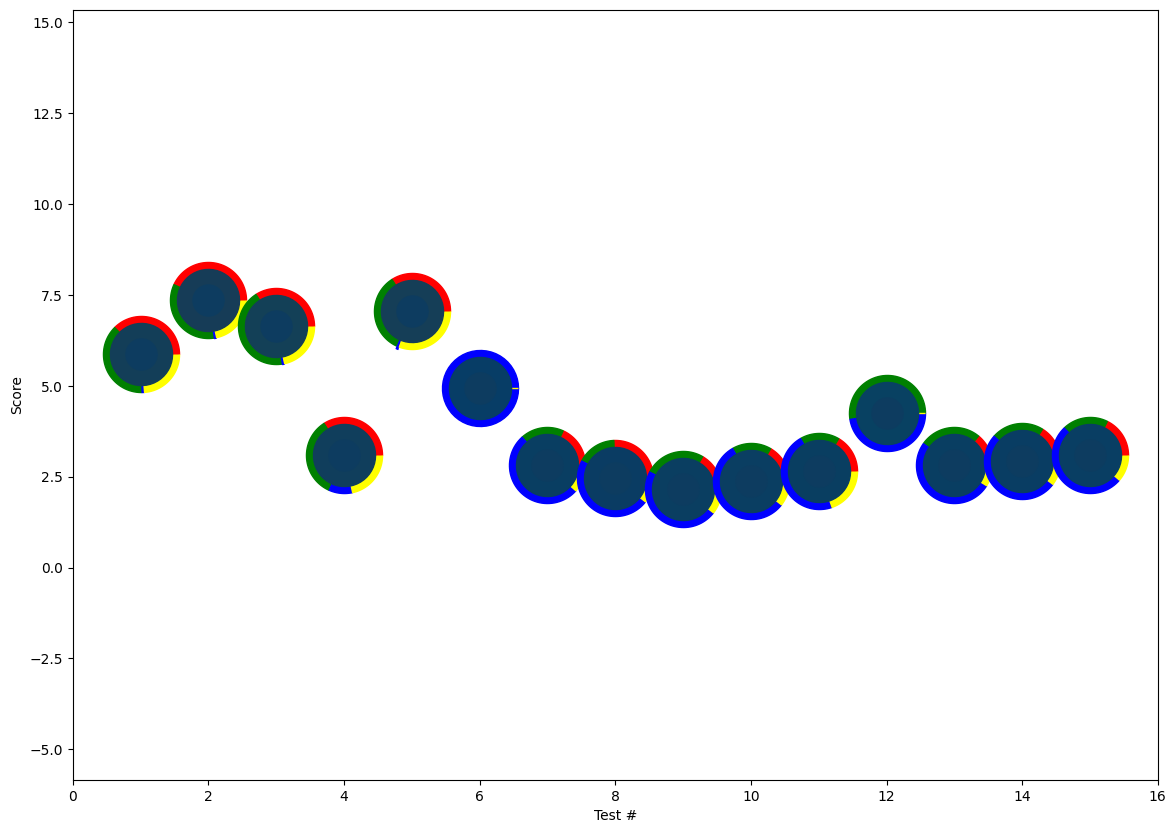

Sent from PC -- TEST STR -- <Mix,2,1.4396834089118145>
Reply Received  Msg Mix,2,1.4396834089118145 Time 2123
Sent from PC -- TEST STR -- <Mix,3,1.8138715387254576>
Reply Received  Msg Mix,3,1.8138715387254576 Time 2128
Sent from PC -- TEST STR -- <Mix,4,3.84691598560199>


KeyboardInterrupt: 

In [57]:
# Run the optimization with L-BFGS-B optimizer
res = minimize(find_color, x0, args=(func_calls), method='SLSQP',
               bounds=4 * [[0.0, 1.0]],
               constraints=({'type': 'eq', 'fun': lambda x:  1 - sum(x)}),
               options={'disp': False, 'eps': 0.1, 'maxiter': 50})
print()
print(res)

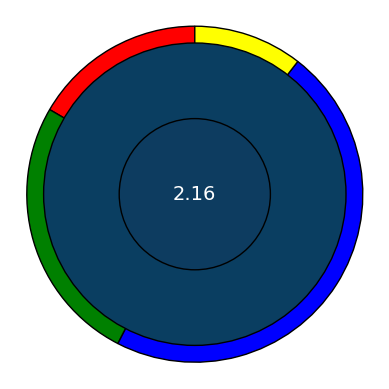

In [58]:
best_idx = np.argmin(scores)
visualize_rgb(mixtures[best_idx], measurements[best_idx], score=scores[best_idx], pump_controller=arduinobot)

In [63]:
mixtures[best_idx]

array([0.16600175, 0.25833432, 0.47063635, 0.10502757])

In [64]:
arduinobot.target_mixture

[0.4, 0.2, 0.3, 0.1]